<h1 align="center"><b>Trabalho 02 – Privacidade Diferencial Mecanismos Laplace & Exponencial<b></h1>
<h1 align="center">
    <a href="https://si3.ufc.br/sigaa/portais/discente/discente.jsf">Davi Oliveira Lopes - Matrícula: 543049</a>
</h1>
<h1 align="center">
    <a href="https://cc.ufc.br/curso/corpo-docente/javam-machado/"> Professor: Javam Machado</a>
</h1>

<a href="https://github.com/daviolp/Trabalho_Privacidade_Diferencial_RSI">
<img src="https://img.shields.io/static/v1?label=GitHub&message=daviolp&color=7159c1&style=for-the-badge&logo=ghost"/>

### ***Importações***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ***Carregando Dataset***

In [2]:
df = pd.read_csv('covid.csv', sep=';', delimiter=None,).drop(['Unnamed: 0'], axis=1)
df.head(3)

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo


### ***Quantidade Total de Registros***

In [3]:
print('------------------------------------|')
print(f'Total de Exames no Dataset: {df.shape[0]}--|')
print('------------------------------------|')

------------------------------------|
Total de Exames no Dataset: 879543--|
------------------------------------|


### ***Cálculo da Data de Nascimento***

In [4]:
df['Nascimento'] = pd.to_datetime(df['Nascimento'], errors = 'coerce')
df['Nascimento'] = pd.to_datetime(df['Nascimento'], format='%Y-%m-%d')

### ***Criação da Coluna 'Idade'***

In [5]:
data_atual = pd.to_datetime('2022-09-22',  format='%Y-%m-%d')
df['idade'] = (data_atual.year - df['Nascimento'].dt.year) - ((data_atual.month - df['Nascimento'].dt.month) < 0)

In [6]:
df = df.query('idade < 122')

In [7]:
df.head(3)

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame,idade
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo,19.0
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo,38.0
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo,40.0


# ***1.1 Mecanismo de Laplace***
<h3 align="left">
<b><span style="color:green">Q1: Média da Idade dos Indivíduos Representados no Dataset</span></b>
</h3>

In [8]:
f_d_linha = (df['idade'].sum() - df['idade']) / (df.shape[0] - 1)
f_d = df['idade'].mean()
delta_f = abs(f_d - f_d_linha.min())
budget = [0.1, 0.5, 1.0, 10.0]

rui = []
ori = []
for valor in budget:
    b = delta_f / valor
    ruido = np.random.laplace(loc=0, scale=b)
    ori.append(f_d)
    rui.append(f_d + ruido)
    print(delta_f, ruido, f_d + ruido, f_d)

8.931494397756978e-05 0.0016116843505509675 41.45027954565167 41.44866786130112
8.931494397756978e-05 -0.00022883702681622114 41.4484390242743 41.44866786130112
8.931494397756978e-05 2.161860583524237e-05 41.44868947990695 41.44866786130112
8.931494397756978e-05 -1.0543559067723314e-05 41.44865731774205 41.44866786130112


<h3 align="left">
<b><span style="color:blue">Gráfico de Exemplificação da Q1</span></b>
</h3>

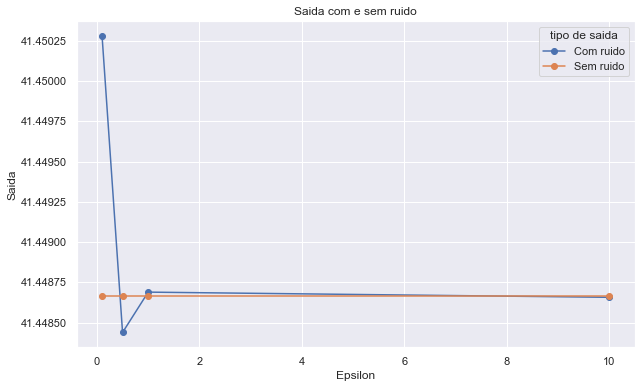

In [9]:
sns.set()
plt.figure(figsize=(10,6))

labe = f'Com ruido'
plt.plot(budget, rui, '-o', label=labe)

labe1 = f'Sem ruido'
plt.plot(budget, ori, '-o', label=labe1)

plt.title(f'Saida com e sem ruido')
plt.legend(title='tipo de saida')
plt.xlabel('Epsilon')
plt.ylabel('Saida')
plt.show()

<h3 align="left">
<b><span style="color:green">Q2: Número de Exames Positivos</span></b>
</h3>

In [10]:
f_d = df.query('ResultadoExame == "Positivo"').shape[0]
delta_f = 1
budget = [0.1, 0.5, 1.0, 10.0] 
rui = []
ori = []

for valor in budget:
    b = delta_f / valor
    ruido = np.random.laplace(loc=0, scale=b)
    ori.append(f_d)
    rui.append(f_d + ruido)
    print(delta_f, ruido, f_d + ruido, f_d)

1 4.379944897650874 265918.37994489766 265914
1 0.49563913605569404 265914.49563913606 265914
1 0.026781971488825995 265914.0267819715 265914
1 -0.04095787145231263 265913.9590421285 265914


<h3 align="left">
<b><span style="color:blue">Gráfico de Exemplificação da Q2</span></b>
</h3>

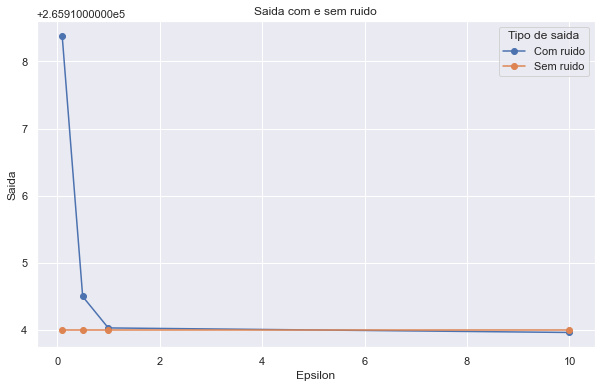

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6))

labe = f'Com ruido'
plt.plot(budget, rui, '-o', label=labe)

labe1 = f'Sem ruido'
plt.plot(budget, ori, '-o', label=labe1)

plt.title(f'Saida com e sem ruido')
plt.legend(title='Tipo de saida')
plt.xlabel('Epsilon')
plt.ylabel('Saida')
plt.show()

<h3 align="left">
<b><span style="color:green"> Q3: Total de Exames Realizados por Município</span></b>
</h3>

In [12]:
f_d = df.groupby(['Municipio']).describe()['idade']['count']
delta_f = 1
budget = [0.1, 0.5, 1.0, 10.0] 

for valor in budget:
    b = delta_f / valor
    ruido = np.random.laplace(loc=0, scale=b)
    print(f'----------------------------------------------------\n{delta_f}{ruido}{f_d + ruido}{f_d} \n----------------------------------------------------')

----------------------------------------------------
1-11.417774282720458Municipio
ABAIARA             605.582226
ACARAPE            2898.582226
ACARAU             6832.582226
ACOPIARA           3057.582226
AIUABA              379.582226
                      ...     
URUBURETAMA        1488.582226
URUOCA             1914.582226
VARJOTA            2667.582226
VARZEA ALEGRE      3233.582226
VICOSA DO CEARA    4168.582226
Name: count, Length: 184, dtype: float64Municipio
ABAIARA             617.0
ACARAPE            2910.0
ACARAU             6844.0
ACOPIARA           3069.0
AIUABA              391.0
                    ...  
URUBURETAMA        1500.0
URUOCA             1926.0
VARJOTA            2679.0
VARZEA ALEGRE      3245.0
VICOSA DO CEARA    4180.0
Name: count, Length: 184, dtype: float64 
----------------------------------------------------
----------------------------------------------------
12.196231580004367Municipio
ABAIARA             619.196232
ACARAPE            2912.196232
AC

# ***1.2 Mecanismo Exponencial***
<h3 align="left">
<b><span style="color:green">Q1: Qual o município com o menor número de casos positivos de COVID-19.</span></b>
</h3>

In [13]:
def exponential(df, opcoes, funcao_de_utilidade, sensitivity, epsilon):
    scores = [funcao_de_utilidade(df, r) for r in opcoes]
    probabilities = [np.exp(epsilon * score / (2 * sensitivity)) for score in scores]
    probabilities = probabilities / np.linalg.norm(probabilities, ord=1)
    return np.random.choice(opcoes, 1, p=probabilities)[0]

In [14]:
options = df['Municipio'].unique()

def funcao_de_utilidade(data, option):
    return data.query('ResultadoExame == "Positivo"').value_counts(['Municipio'])[option]/data.shape[0]

In [15]:
budget = [0.1, 0.5, 1.0, 10.0] 
sensitivity = 1
all_e_results = {}

for valor in budget:
    result = []
    for j in range(10):
        result.append(exponential(df, options, funcao_de_utilidade, sensitivity, valor))
    all_e_results[str(valor)] = result

In [16]:
df2 = pd.DataFrame(all_e_results)
df2

,0.1,0.5,1.0,10.0
0,MILHA,SALITRE,PARAMOTI,LIMOEIRO DO NORTE
1,POTIRETAMA,UBAJARA,ITAPAJE,IPUEIRAS
2,PENTECOSTE,IBIAPINA,MORRINHOS,JAGUARUANA
3,JUCAS,SAO GONCALO DO AMARANTE,JAGUARIBARA,VARJOTA
4,BARBALHA,MADALENA,APUIARES,BANABUIU
5,CARIRE,MONSENHOR TABOSA,JAGUARETAMA,VARZEA ALEGRE
6,BREJO SANTO,JAGUARUANA,AMONTADA,POTENGI
7,CAMPOS SALES,APUIARES,ARACATI,GRANJA
8,CASCAVEL,BARRO,NOVO ORIENTE,IBARETAMA
9,QUITERIANOPOLIS,AURORA,COREAU,CHORÓ


Histograma para epsilon: 0.1


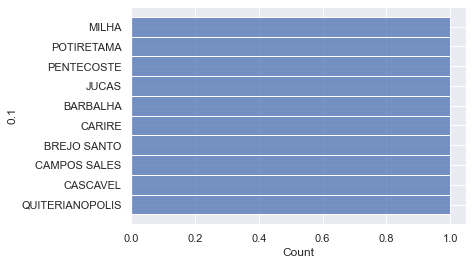

Histograma para epsilon: 0.5


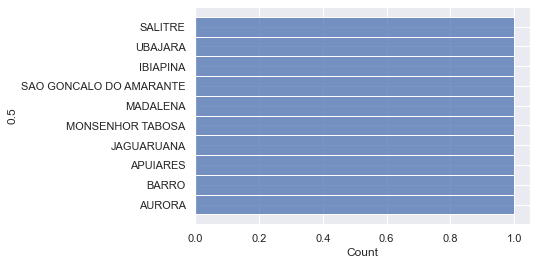

Histograma para epsilon: 1.0


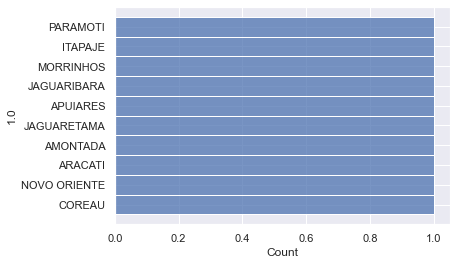

Histograma para epsilon: 10.0


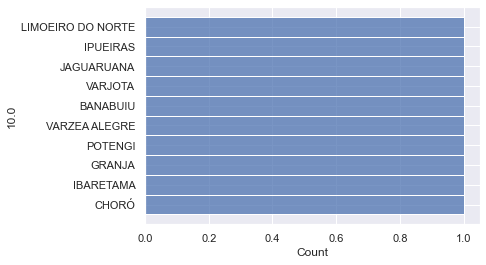

In [17]:
for inte1 in budget:
    print(f'Histograma para epsilon: {inte1}')
    sns.histplot(data=df2, y=str(inte1))
    plt.show()

In [18]:
df.query('ResultadoExame == "Positivo"').value_counts(['Municipio'])

Municipio        
FORTALEZA            52558
JUAZEIRO DO NORTE    12298
SOBRAL                9990
CRATO                 8488
MARACANAU             7273
                     ...  
AIUABA                  71
ANTONINA DO NORTE       64
ARNEIROZ                59
PENAFORTE               58
TARRAFAS                50
Length: 184, dtype: int64

<h3 align="left">
<b><span style="color:green">Q2: Qual a raça com o maior número de casos negativos de COVID-19.</span></b>
</h3>

In [19]:
budget = [0.1, 0.5, 1.0, 10.0] 
sensitivity = 1
all_e_results = {}

for valor in budget:
    result = []
    for j in range(10):
        result.append(exponential(df, options, funcao_de_utilidade, sensitivity, valor))
    all_e_results[str(valor)] = result

In [20]:
df3 = pd.DataFrame(all_e_results)
df3

,0.1,0.5,1.0,10.0
0,CAPISTRANO,MOMBACA,MILHA,CARIDADE
1,RERIUTABA,URUOCA,GRANJEIRO,SAO JOAO DO JAGUARIBE
2,CHAVAL,IGUATU,CRATO,PALHANO
3,URUOCA,PEREIRO,ARARENDA,MISSAO VELHA
4,CRATEUS,MARTINOPOLE,MADALENA,MADALENA
5,ARACOIABA,SAO GONCALO DO AMARANTE,JUAZEIRO DO NORTE,MORADA NOVA
6,TEJUCUOCA,LIMOEIRO DO NORTE,BEBERIBE,SAO BENEDITO
7,MARANGUAPE,VARZEA ALEGRE,ITAITINGA,GROAIRAS
8,SANTANA DO ACARAU,MILHA,CRATEUS,FORTALEZA
9,MARCO,ITAITINGA,BANABUIU,PIQUET CARNEIRO


Histograma para epsilon: 0.1


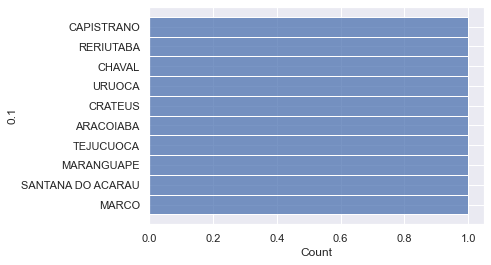

Histograma para epsilon: 0.5


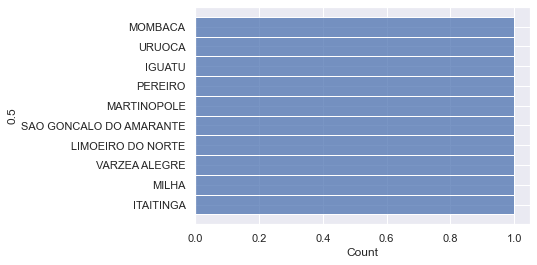

Histograma para epsilon: 1.0


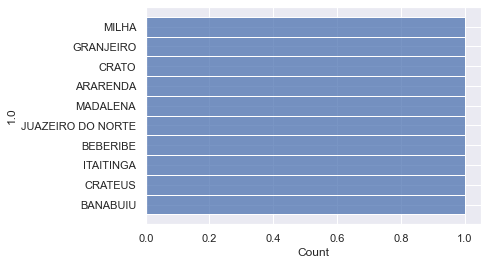

Histograma para epsilon: 10.0


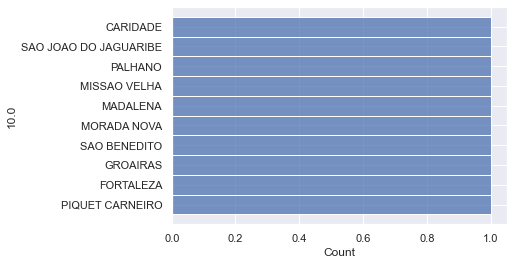

In [21]:
for inte2 in budget:
    print(f'Histograma para epsilon: {inte2}')
    sns.histplot(data=df3, y=str(inte2))
    plt.show()

In [30]:
df.query('ResultadoExame == "Negativo"').value_counts(['Nascimento'])[0:1]

Nascimento
1994-05-02    97
dtype: int64